# Data exploration 
## Reading and accessing salary data

The following module reads the input using pandas and prints the first row. Using Pandas data is stored as a dataframes which provides excel or SQL table kind of structure.


In [198]:
import pandas as pd

#read the profiles of student from various background contained in a csv
salary_df = pd.read_csv("Project_Stage1_SK.csv")
print(salary_df.shape)

#display columns present in csv
print(salary_df.columns)
print(salary_df.head())

(3983, 30)
Index(['candidateid', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', 'tenthpercentage', 'tenthboard', 'twelvegraduation',
       'twelvepercentage', 'twelveboard', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegepercentage', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg'],
      dtype='object')
   candidateid   salary             doj             dol  \
0       203097   420000  1/06/2012 0:00         present   
1       579905   500000  1/09/2013 0:00         present   
2       810601   325000  1/06/2014 0:00         present   
3       267447  1100000  1/07/2011 0:00         present   
4       343523   200000  1/03/2014 0:00  1/03/2015 0:00   

                designation    jobcity gender              dob  \
0   senior quality engineer  Bangalore      f  19/02/

## Accessing data values from data frame
The following module access and prints CandidateID and Salary of the first row. 


In [199]:
column_name = salary_df.columns
columns = ["candidateid","salary"]
first_row = salary_df.loc[0]

print(first_row[columns])#gives the output for first row of the columns in the dataframe


candidateid    203097
salary         420000
Name: 0, dtype: object


# Exploration and Cleaning of data


# Reading metadata of the dataset
The following module prints the number of columns,rows and the description such as count, stand deviation and mean etc..

In [200]:
#print the number of rows
matrix = salary_df.shape
num_rows = matrix[0]
print("number of rows:",num_rows)

#print the number of columns
num_columns = matrix[1]
print("number of columns:",num_columns)

# calculating the descriptive statistics data for salary data
description = salary_df.describe()
print(description)


number of rows: 3983
number of columns: 30
        candidateid        salary  tenthpercentage  twelvegraduation  \
count  3.983000e+03  3.983000e+03      3983.000000       3983.000000   
mean   6.628445e+05  3.079460e+05        77.924587       2008.082601   
std    3.633855e+05  2.130068e+05         9.848771          1.654167   
min    1.124400e+04  3.500000e+04        43.000000       1995.000000   
25%    3.338265e+05  1.800000e+05        71.720000       2007.000000   
50%    6.386740e+05  3.000000e+05        79.200000       2008.000000   
75%    9.901115e+05  3.700000e+05        85.665000       2009.000000   
max    1.298275e+06  4.000000e+06        97.760000       2013.000000   

       twelvepercentage     collegeid  collegetier  collegepercentage  \
count       3983.000000   3983.000000  3983.000000        3983.000000   
mean          74.471152   5156.211650     1.926186          71.505674   
std           10.998375   4806.208048     0.261500           8.114364   
min           40

# Cleaning of Data based on above description of the dataset

In [201]:
#The following module drops columns that are found to be unrelated to target column(Salary)
salary_df = salary_df.drop("dol",1) #dol - date of leaving
#salary_df = salary_df.drop("collegestate",1)

print(salary_df.shape)
#The following module does not consider the JobCity marked as 'NA'
salary_df = salary_df[salary_df.jobcity != "NA"]




(3983, 29)


In [202]:
#Preprocessing step for computing specialization score
#replacing -1 and 0 with Nan for different columns

import numpy as np
salary_df["computerprogramming"]=salary_df["computerprogramming"].replace(-1,np.nan,regex=True)
salary_df["electronicsandsemicon"]=salary_df["electronicsandsemicon"].replace(-1,np.nan,regex=True)
salary_df["computerscience"]=salary_df["computerscience"].replace(-1,np.nan,regex=True)
salary_df["mechanicalengg"]=salary_df["mechanicalengg"].replace(-1,np.nan,regex=True)
salary_df["electricalengg"]=salary_df["electricalengg"].replace(-1,np.nan,regex=True)
salary_df["telecomengg"]=salary_df["telecomengg"].replace(-1,np.nan,regex=True)
salary_df["civilengg"]=salary_df["civilengg"].replace(-1,np.nan,regex=True)
salary_df["jobcity"]=salary_df["jobcity"].replace("-1","NA",regex=True)
salary_df["tenthboard"]=salary_df["tenthboard"].replace("0",np.nan,regex=True)
salary_df["twelveboard"]=salary_df["twelveboard"].replace("0",np.nan,regex=True)

In [203]:
#Compution of specialization score by calculating the mean by combining all the columns computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg and renaming to specialization_score
salary_df["specialization_score"] = salary_df[['computerprogramming','electronicsandsemicon','computerscience','mechanicalengg','electricalengg','telecomengg','civilengg']].mean(axis=1)

In [204]:
#Preprocessing step for computing linear regression
#replacing Nan with 0 for different columns

salary_df["computerprogramming"]=salary_df["computerprogramming"].replace("Nan",0,regex=True)
salary_df["electronicsandsemicon"]=salary_df["electronicsandsemicon"].replace("Nan",0,regex=True)
salary_df["computerscience"]=salary_df["computerscience"].replace("Nan",0,regex=True)
salary_df["mechanicalengg"]=salary_df["mechanicalengg"].replace("Nan",0,regex=True)
salary_df["electricalengg"]=salary_df["electricalengg"].replace("Nan",0,regex=True)
salary_df["telecomengg"]=salary_df["telecomengg"].replace("Nan",0,regex=True)
salary_df["civilengg"]=salary_df["civilengg"].replace("Nan",0,regex=True)
salary_df["specialization_score"]=salary_df["specialization_score"].replace("Nan",0,regex=True)

In [205]:
#Creating a salary_category column and classifying salary_category data to broad categories 

pd.options.mode.chained_assignment = None #default warn
salary_df['salary_category']=salary_df['salary']
salary_df['salary_category'][(salary_df['salary'] <= 250000)] = 0
salary_df['salary_category'][(salary_df['salary'] > 250000) & (salary_df['salary'] <= 500000)] = 1
salary_df['salary_category'][(salary_df['salary'] > 500000) & (salary_df['salary'] <= 1000000)] = 2

#handling outliers, anything above salary 2500000 is ignored
salary_df['salary_category'][(salary_df['salary'] > 1000000)] = 3

In [206]:
#Preprocessing steps to classify specialization data to broad categories

salary_df["specialization"]=salary_df["specialization"].replace(".*computer.*","Computer Science",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*[eE]lec.*","Electronics and Electric",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*information.*","Information Technology",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*civil.*","Civil Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*mech.*","Mechnical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*industrial.*","Industrial Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*instrumentation.*","Instrumentation Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*bio.*","Bio Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*auto.*","Automobile Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*metal.*","Metallurgical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*chemical.*","Chemical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*polymer.*","Polymer Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*embedded.*","Electronics and Electric",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*aeronautical.*","Aeronautical engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*combustion.*","Mechnical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*ceramic.*","Ceramic Engineering",regex =True)

#prints the unique values of specialization
print(salary_df.specialization.unique())



['Computer Science' 'Electronics and Electric' 'Information Technology'
 'Instrumentation Engineering' 'Mechnical Engineering' 'Civil Engineering'
 'Industrial Engineering' 'Metallurgical Engineering' 'Ceramic Engineering'
 'Chemical Engineering' 'Aeronautical engineering' 'other'
 'Bio Engineering' 'Automobile Engineering' 'Polymer Engineering']


## Converting Text Data to Numerical value 

In [207]:
#converting the specialization value to numerical value

salary_df.loc[salary_df["specialization"] == "Computer Science", "specialization"] = 0
salary_df.loc[salary_df["specialization"] == "Electronics and Electric", "specialization"] = 1
salary_df.loc[salary_df["specialization"] == "Information Technology", "specialization"] = 2
salary_df.loc[salary_df["specialization"] == "Instrumentation Engineering", "specialization"] = 3
salary_df.loc[salary_df["specialization"] == "Mechnical Engineering", "specialization"] = 4
salary_df.loc[salary_df["specialization"] == "Metallurgical Engineering", "specialization"] = 5
salary_df.loc[salary_df["specialization"] == "Ceramic Engineering", "specialization"] = 6
salary_df.loc[salary_df["specialization"] == "Aeronautical engineering", "specialization"] = 7
salary_df.loc[salary_df["specialization"] == "Chemical Engineering", "specialization"] = 8
salary_df.loc[salary_df["specialization"] == "other", "specialization"] = 9
salary_df.loc[salary_df["specialization"] == "Bio Engineering", "specialization"] = 10
salary_df.loc[salary_df["specialization"] == "Automobile Engineering", "specialization"] = 12
salary_df.loc[salary_df["specialization"] == "Polymer Engineering", "specialization"] = 13
salary_df.loc[salary_df["specialization"] == "Civil Engineering", "specialization"] = 14
salary_df.loc[salary_df["specialization"] == "Industrial Engineering", "specialization"] = 15

#prints the unique values of specialization
print(salary_df.specialization.unique())


[0 1 2 3 4 14 15 5 6 8 7 9 10 12 13]


In [208]:
#converting column Degree to numerical value
salary_df.loc[salary_df["degree"] == "B.Tech/B.E.", "degree"] = 0
salary_df.loc[salary_df["degree"] == "M.Sc. (Tech.)", "degree"] = 1
salary_df.loc[salary_df["degree"] == "M.Tech./M.E.", "degree"] = 2
salary_df.loc[salary_df["degree"] == "MCA", "degree"] = 3

#to_numeric function converts string to numeric datatype
salary_df["degree"] = pd.to_numeric(salary_df["degree"])

#prints the unique values of specialization
print(salary_df.degree.unique())


[0 3 2 1]


In [209]:
#converting the Gender value to numerical value
salary_df.loc[salary_df["gender"] == "m", "gender"] = 0
salary_df.loc[salary_df["gender"] == "f", "gender"] = 1

#to_numeric function converts string to numeric datatype
salary_df["gender"] = pd.to_numeric(salary_df["gender"])


In [210]:
#returns the datatype of each of the columns
#to_numeric function converts string to numeric datatype
salary_df["specialization"] = pd.to_numeric(salary_df["specialization"])
print(salary_df.dtypes)

candidateid                int64
salary                     int64
doj                       object
designation               object
jobcity                   object
gender                     int64
dob                       object
tenthpercentage          float64
tenthboard                object
twelvegraduation           int64
twelvepercentage         float64
twelveboard               object
collegeid                  int64
collegetier                int64
degree                     int64
specialization             int64
collegepercentage        float64
collegestate              object
graduationyear             int64
english                    int64
logical                    int64
quant                      int64
computerprogramming      float64
electronicsandsemicon    float64
computerscience          float64
mechanicalengg           float64
electricalengg           float64
telecomengg              float64
civilengg                float64
specialization_score     float64
salary_cat

In [211]:
#Step to re calculate the statistics after pre processing
#print the number of rows
matrix = salary_df.shape
num_rows = matrix[0]
print("number of rows:",num_rows)
#print the number of columns
num_columns = matrix[1]
print("number of columns:",num_columns)
# calculating the descriptive statistics data for salary data
description = salary_df.describe()
print(description)


number of rows: 3983
number of columns: 31
        candidateid        salary       gender  tenthpercentage  \
count  3.983000e+03  3.983000e+03  3983.000000      3983.000000   
mean   6.628445e+05  3.079460e+05     0.239769        77.924587   
std    3.633855e+05  2.130068e+05     0.426996         9.848771   
min    1.124400e+04  3.500000e+04     0.000000        43.000000   
25%    3.338265e+05  1.800000e+05     0.000000        71.720000   
50%    6.386740e+05  3.000000e+05     0.000000        79.200000   
75%    9.901115e+05  3.700000e+05     0.000000        85.665000   
max    1.298275e+06  4.000000e+06     1.000000        97.760000   

       twelvegraduation  twelvepercentage     collegeid  collegetier  \
count       3983.000000       3983.000000   3983.000000  3983.000000   
mean        2008.082601         74.471152   5156.211650     1.926186   
std            1.654167         10.998375   4806.208048     0.261500   
min         1995.000000         40.000000      2.000000     1.000

# Visualisation with matplotlib

## Univariate Analysis using Box Plot 

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


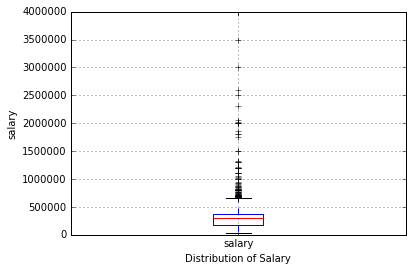

In [212]:
#Box plot for Salary Analysis to understand the distribution
%matplotlib inline
import matplotlib.pyplot as plt
salary_df.boxplot(column="salary")
plt.xlabel("Distribution of Salary")
plt.ylabel("salary")


## Bivariate Analysis for continous to categorical data

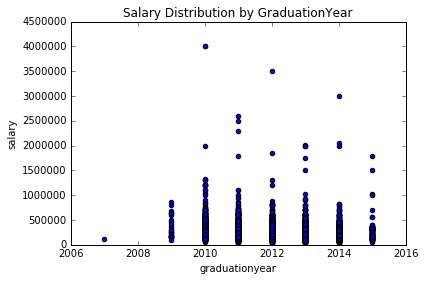

In [213]:
#Plotting scatter graph for Salary Distribution by GraduationYear
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["graduationyear"],salary_df["salary"])
plt.title("Salary Distribution by GraduationYear")
plt.xlabel("graduationyear")
plt.ylabel("salary")
#plt.axis([2007,2015,0,5000000])
plt.xlim(2006,2016)
plt.ylim(0,4500000)
plt.show()


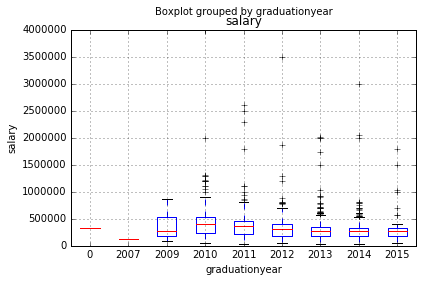

In [214]:
#Plotting a Box plot for Salary Distribution by GraduationYear
salary_df.boxplot(column="salary",by="graduationyear")
plt.xlabel("graduationyear")
plt.ylabel("salary")

In [215]:
#from time import strftime
#print("Start time",strftime("%Y-%m-%d %H:%M:%S"))
#salary_df.plot(kind='bar')
#plt.xlabel("graduationyear")
#plt.ylabel("salary")
#print("End time",strftime("%Y-%m-%d %H:%M:%S"))

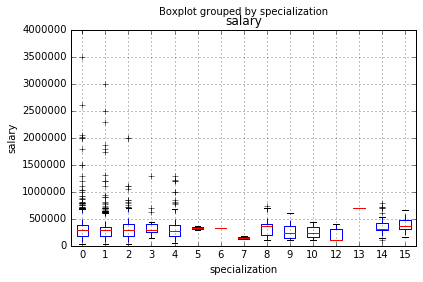

In [216]:
#Plotting a Box plot for Salary Distribution by GraduationYear
salary_df.boxplot(column="salary",by="specialization")
plt.xlabel("specialization")
plt.ylabel("salary")

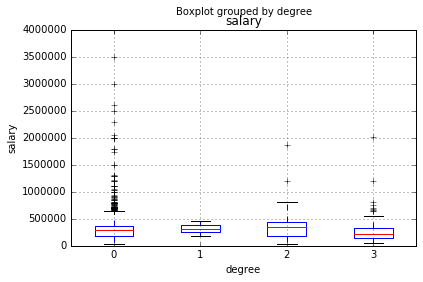

In [217]:
#Plotting a Box plot for Salary Distribution by Degree
salary_df.boxplot(column="salary",by="degree")
plt.xlabel("degree")
plt.ylabel("salary")

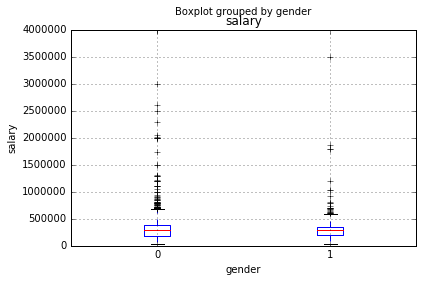

In [218]:
#Plotting a Box plot for Salary Distribution by Gender
salary_df.boxplot(column="salary",by="gender")
plt.xlabel("gender")
plt.ylabel("salary")

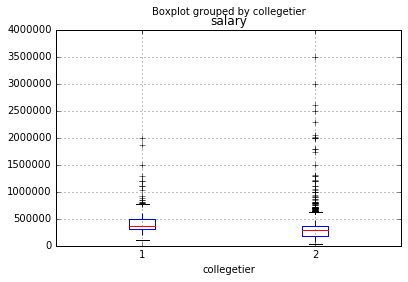

In [219]:
#Plotting a Box plot for Salary Distribution by CollegeTier
salary_df.boxplot(column="salary",by="collegetier")

## Bivariate Analysis for Continous to Continous data 

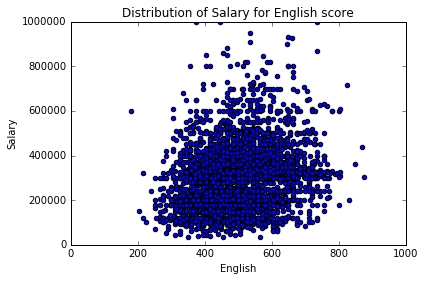

In [220]:
#Plotting Scatter Graph to show the distribution for English AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["english"],salary_df["salary"])
plt.title("Distribution of Salary for English score")
plt.xlabel("English")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000,500000)

plt.show()

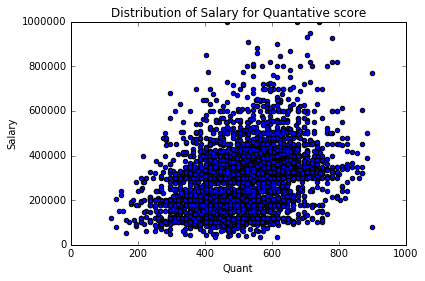

In [221]:
#Plotting Scatter Graph to show the distribution for Quantative AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["quant"],salary_df["salary"])
plt.title("Distribution of Salary for Quantative score")
plt.xlabel("Quant")
plt.ylabel("Salary")
#plt.xlim(0,1000)
plt.ylim(0,1000000,500000)
plt.show()

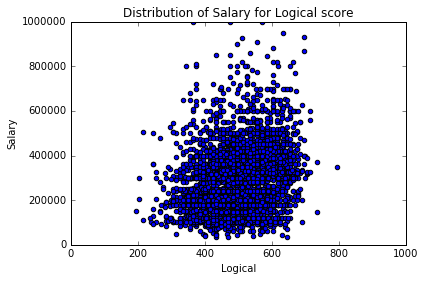

In [222]:
#Plotting Scatter Graph to show the distribution for Logical AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["logical"],salary_df["salary"])
plt.title("Distribution of Salary for Logical score")
plt.xlabel("Logical")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000,500000)
plt.show()

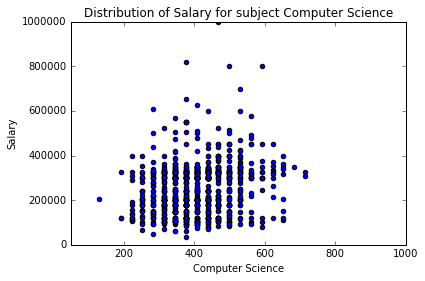

In [223]:
#Plotting Scatter Graph to show the distribution for Computerscience Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["computerscience"],salary_df["salary"])
plt.title("Distribution of Salary for subject Computer Science")
plt.xlabel("Computer Science")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000)
plt.show()

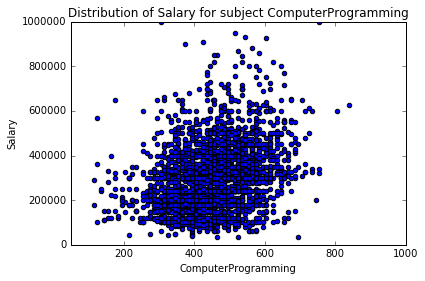

In [224]:
#Plotting Scatter Graph to show the distribution for Computerscience Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["computerprogramming"],salary_df["salary"])
plt.title("Distribution of Salary for subject ComputerProgramming")
plt.xlabel("ComputerProgramming")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000,500000)
plt.show()

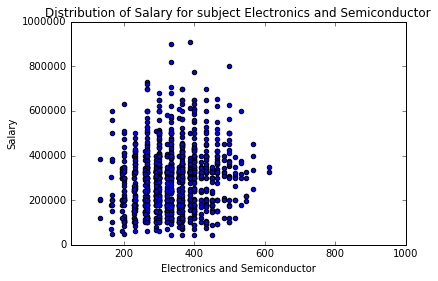

In [225]:
#Plotting Scatter Graph to show the distribution for electronics and semiconductor
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["electronicsandsemicon"],salary_df["salary"])
plt.title("Distribution of Salary for subject Electronics and Semiconductor")
plt.xlabel("Electronics and Semiconductor")
plt.ylabel("Salary")
plt.xlim(50,1000,100)
plt.ylim(0,1000000,500000)
plt.show()

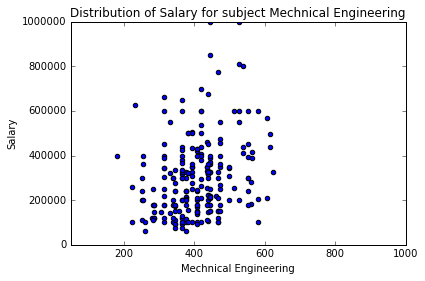

In [226]:
#Plotting Scatter Graph to show the distribution for Mechnical Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["mechanicalengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Mechnical Engineering")
plt.xlabel("Mechnical Engineering")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000)
plt.show()

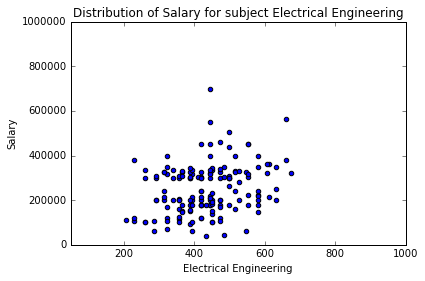

In [227]:
#Plotting Scatter Graph to show the distribution for Electrical Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["electricalengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Electrical Engineering")
plt.xlabel("Electrical Engineering")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000)
plt.show()

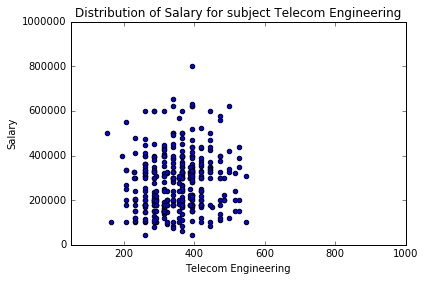

In [228]:
#Plotting Scatter Graph to show the distribution for Telecom Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["telecomengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Telecom Engineering")
plt.xlabel("Telecom Engineering")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000)
plt.show()

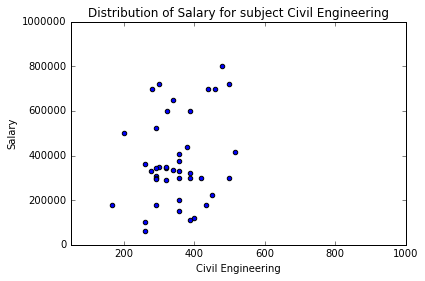

In [229]:
#Plotting Scatter Graph to show the distribution for Civil Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["civilengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Civil Engineering")
plt.xlabel("Civil Engineering")
plt.ylabel("Salary")
plt.xlim(50,1000)
plt.ylim(0,1000000)
plt.show()

# Calculating correlation
Spearman correlation is used here instead of Pearson as it is understood that Spearman correlation is not influenced by the effect of outliers

In [230]:
#Calculating the spearmans correlation of columns
salary_df.corr(method ='spearman')["salary"]

candidateid             -0.307386
salary                   1.000000
gender                  -0.028113
tenthpercentage          0.294069
twelvegraduation        -0.162419
twelvepercentage         0.279753
collegeid               -0.146554
collegetier             -0.200638
degree                  -0.068346
specialization           0.007307
collegepercentage        0.225313
graduationyear          -0.234415
english                  0.269678
logical                  0.255382
quant                    0.364347
computerprogramming      0.223376
electronicsandsemicon    0.012582
computerscience         -0.143926
mechanicalengg          -0.001089
electricalengg          -0.061746
telecomengg             -0.025366
civilengg                0.039505
specialization_score     0.259944
salary_category          0.895751
Name: salary, dtype: float64

In [29]:
# convert dataframe salary_df to dictionary salary_dict to load to postgreSQL
#Salary_dict = salary_df.set_index('CandidateID').T.to_dict('list')
import pprint
salary_dict ={}
salary_list =[]

#convert dataframe to list
salary_list = salary_df.T.to_dict().values()


In [30]:
""" utility function to execute some SQL statement can take optional arguments to fill in (dictionary) error 
and transaction handling built-in """

def pgexec( conn, sqlcmd, args, msg, silent=False ):
   
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval

In [31]:
""" utility function to execute some SQL query statement
       can take optional arguments to fill in (dictionary)
       will print out on screen the result set of the query
       error and transaction handling built-in """

def pgquery( conn, sqlcmd, args, silent=False ):
   
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
                cur.execute(sqlcmd)
            else:
                cur.execute(sqlcmd, args)
            if silent == False:
                for record in cur:
                    print(record)
            retval = True
         except Exception as e:
            if silent == False:
                print("db read error: ")
                print(e)
   return retval

In [32]:
# get connected to the database
import psycopg2
DATABASENAME = 'skal3538'

try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)
#connection = pg.connect("dbname=skal3538 user=skal3538")
#print("Connected")


unable to connect to the database
could not connect to server: No such file or directory
	Is the server running locally and accepting
	connections on Unix domain socket "/tmp/.s.PGSQL.5432"?



In [129]:
# check content of Salary table

query_stmt = "SELECT * FROM salary;"
print(query_stmt)
pgquery (conn, query_stmt, None)


conn.close();

SELECT * FROM salary;
(203097, Decimal('420000'), None, 'senior quality engineer', 'Bangalore                                                   ', 1, None, Decimal('84'), 'board ofsecondary education,ap', None, Decimal('96'), 'board of intermediate education,ap', Decimal('2'), Decimal('0'), '0                                                           ', Decimal('78.0'), None, Decimal('515'), Decimal('585'), Decimal('525'), Decimal('445'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'))
(579905, Decimal('500000'), None, 'assistant manager', 'Indore                                                      ', 0, None, Decimal('85'), 'cbse', None, Decimal('85'), 'cbse', Decimal('2'), Decimal('0'), '1                                                           ', Decimal('70.06'), None, Decimal('695'), Decimal('610'), Decimal('780'), Decimal('NaN'), Decimal('466'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'))
(8106

In [181]:
import psycopg2
try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)
    
try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)

# 2nd: load data
# IMPORTANT: make sure the header line of CSV is without spaces!
#insert_stmt = """INSERT INTO Salary(candidateid,graduationyear,salary,specialisation,doj,designation,jobcity,gender,dob,percent10,
#                    board10,graduation12,percentage12,board12,collegetier,degree,collegepercentage,logical,english,quant,computerprogramming,
#                    electronicsandsemicon,computerscience,mechanicalengg,electicalengg,telecomengg,civilengg)
#                     VALUES (%(source)s, %(oct04_flux)s, %(oct04_err)s, %(oct05_flux)s, %(oct05_err)s, %(apr06_flux)s, %(apr06_err)s)"""
insert_stmt = """insert into Salary(candidateid,salary,designation,
jobcity,gender,tenthpercentage,tenthboard,
twelvepercentage,twelveboard,collegetier,degree,specialization,
collegepercentage,english,logical,quant,computerprogramming,
electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg)
values 
(%(candidateid)s,%(salary)s,%(designation)s,
%(jobcity)s,%(gender)s,%(tenthpercentage)s,%(tenthboard)s,
%(twelvepercentage)s,%(twelveboard)s,%(collegetier)s,%(degree)s,%(specialization)s,
%(collegepercentage)s,%(english)s,%(logical)s,%(quant)s,%(computerprogramming)s,
%(electronicsandsemicon)s,%(computerscience)s,%(mechanicalengg)s,%(electricalengg)s,%(telecomengg)s,%(civilengg)s);"""
i=0
#print(Salary_dict[203097])
#print(Salary_list[0])
for row in salary_list:
#if i == 0:
        pgexec (conn, insert_stmt, row, "row inserted")
        #print(row)
#i = i+1

connected
connected
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row

# Project Stage 2

## Initial Data Load

Intial data load by getting all the numeric fields from the salary_df dataframe and assign it to df_numeric_only.

In [231]:
#Get the numeric fields from the salary_df dataframe and assign it to df_numeric_only
df_numeric_only = salary_df._get_numeric_data()
print(df_numeric_only.shape)
data = df_numeric_only

#assign data with predictor features only
target = df_numeric_only["salary"]
target = target/1000 #salary in 1000's

#drop to keep only relevant features
data = data.drop("salary",axis=1)
data = data.drop("salary_category",axis=1)
data = data.drop("computerprogramming",axis=1)
data = data.drop("electronicsandsemicon",axis=1)
data = data.drop("computerscience",axis=1)
data = data.drop("mechanicalengg",axis=1)
data = data.drop("electricalengg",axis=1)
data = data.drop("telecomengg",axis=1)
data = data.drop("civilengg",axis=1)
print(data.columns)
print(data.shape)
print(target.shape)

(3983, 24)
Index(['candidateid', 'gender', 'tenthpercentage', 'twelvegraduation',
       'twelvepercentage', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegepercentage', 'graduationyear', 'english',
       'logical', 'quant', 'specialization_score'],
      dtype='object')
(3983, 15)
(3983,)


In [232]:
#Correlation value for initial data load
print('Correlation value:\n',df_numeric_only.corr(method ='spearman')['salary'])

Correlation value:
 candidateid             -0.307386
salary                   1.000000
gender                  -0.028113
tenthpercentage          0.294069
twelvegraduation        -0.162419
twelvepercentage         0.279753
collegeid               -0.146554
collegetier             -0.200638
degree                  -0.068346
specialization           0.007307
collegepercentage        0.225313
graduationyear          -0.234415
english                  0.269678
logical                  0.255382
quant                    0.364347
computerprogramming      0.223376
electronicsandsemicon    0.012582
computerscience         -0.143926
mechanicalengg          -0.001089
electricalengg          -0.061746
telecomengg             -0.025366
civilengg                0.039505
specialization_score     0.259944
salary_category          0.895751
Name: salary, dtype: float64


## Oulier treatment

In [233]:
#Get the numeric fields from the salary_df dataframe and assign it to df_numeric_only and trating the outliers 
# -by taking values less than 1000k
df_numeric_only = df_numeric_only[df_numeric_only["salary"] < 1000000] 
print(df_numeric_only.shape)

data = df_numeric_only

#assign data with predictor features only
target = df_numeric_only["salary"]
target = target/1000 #salary in 1000's


#drop to keep only relevant features
data = data.drop("salary",axis=1)
data = data.drop("salary_category",axis=1)
data = data.drop("computerprogramming",axis=1)
data = data.drop("electronicsandsemicon",axis=1)
data = data.drop("computerscience",axis=1)
data = data.drop("mechanicalengg",axis=1)
data = data.drop("electricalengg",axis=1)
data = data.drop("telecomengg",axis=1)
data = data.drop("civilengg",axis=1)
print(data.columns)
print(data.shape)
print(target.shape)

(3944, 24)
Index(['candidateid', 'gender', 'tenthpercentage', 'twelvegraduation',
       'twelvepercentage', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegepercentage', 'graduationyear', 'english',
       'logical', 'quant', 'specialization_score'],
      dtype='object')
(3944, 15)
(3944,)


In [234]:
#Correlation value for salary after the outlier has been removed
print('Correlation value:\n',df_numeric_only.corr(method ='spearman')['salary'])

Correlation value:
 candidateid             -0.302619
salary                   1.000000
gender                  -0.026203
tenthpercentage          0.298897
twelvegraduation        -0.155874
twelvepercentage         0.286051
collegeid               -0.143841
collegetier             -0.194770
degree                  -0.073309
specialization           0.006853
collegepercentage        0.228827
graduationyear          -0.229321
english                  0.273191
logical                  0.258978
quant                    0.369480
computerprogramming      0.227141
electronicsandsemicon    0.014140
computerscience         -0.145003
mechanicalengg          -0.008214
electricalengg          -0.059178
telecomengg             -0.023418
civilengg                0.041874
specialization_score     0.263031
salary_category          0.892443
Name: salary, dtype: float64


# Simple Linear Regression - Continous variables

Feature: english 
alpha: 124456.104278 beta: 338.114689709 r-squared: 0.252291463132
p-value for a two-sided test of H0 that slope is 0: 2.5372891502548467e-58
Can we reject H0? Yes
135793.72673913496

Scatter plot with regression line and 95% prediction interval:


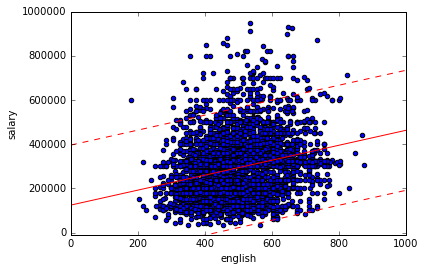

In [235]:
#Building a simple linear model to describe the relationship.
# The following procedure is performed to perform Null hypothesis testing. The relationship between each 
#  -feature is evaluated with the target value

from scipy.stats import linregress
import numpy as np
import math


#different fuctions(procedures) used for the evaluation of feature selection
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))
def standard_error(alpha, beta, x, y):
    return math.sqrt(sum_of_squared_errors(alpha, beta, x, y) / len(y))



#evaluate english for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["english"], df_numeric_only["salary"])
print('Feature: english \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')
#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["english"], df_numeric_only["salary"])
print(stderr)
#print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["english"], df_numeric_only["salary"])
_ = plt.xlim(0,1000)
_ = plt.ylim(-10000,1000000)
_ = plt.xlabel('english')
_ = plt.ylabel('salary')
_ = plt.plot([0,1000], [predict(intercept,slope,0), predict(intercept,slope,1000)], 'r',
             [0,1000], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,1000)-2*stderr], 'r--',
             [0,1000], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,1000)+2*stderr], 'r--')


Feature: quant 
alpha: 86385.7519347 beta: 404.565471241 r-squared: 0.351189350947
p-value for a two-sided test of H0 that slope is 0: 7.654358080130247e-115
Can we reject H0? Yes

Scatter plot with regression line and 95% prediction interval:


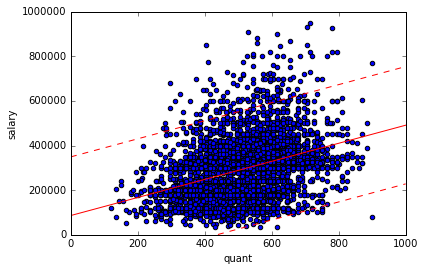

In [236]:
#evaluate quant for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["quant"], df_numeric_only["salary"])

print('Feature: quant \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')
#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["quant"], df_numeric_only["salary"])
#print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["quant"], df_numeric_only["salary"])
_ = plt.xlim(0,1000)
_ = plt.ylim(0,1000000)
_ = plt.xlabel('quant')
_ = plt.ylabel('salary')
_ = plt.plot([0,1000], [predict(intercept,slope,0), predict(intercept,slope,1000)], 'r',
             [0,1000], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,1000)-2*stderr], 'r--',
             [0,1000], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,1000)+2*stderr], 'r--')


Feature: logical 
alpha: 93533.5477462 beta: 399.625862377 r-squared: 0.24653382065
p-value for a two-sided test of H0 that slope is 0: 1.0861348845769442e-55
Can we reject H0? Yes

Scatter plot with regression line and 95% prediction interval:


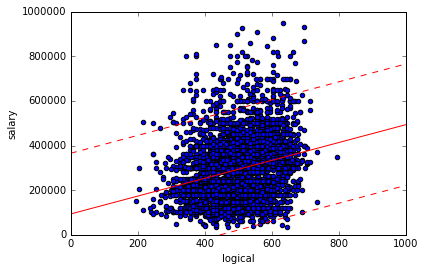

In [237]:
#evaluate logical for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["logical"], df_numeric_only["salary"])

print('Feature: logical \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')
#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["logical"], df_numeric_only["salary"])
#print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["logical"], df_numeric_only["salary"])
_ = plt.xlim(0,1000)
_ = plt.ylim(0,1000000)
_ = plt.xlabel('logical')
_ = plt.ylabel('salary')
_ = plt.plot([0,1000], [predict(intercept,slope,0), predict(intercept,slope,1000)], 'r',
             [0,1000], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,1000)-2*stderr], 'r--',
             [0,1000], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,1000)+2*stderr], 'r--')


Feature: specialization_score 
alpha: 185154.663394 beta: 265.75315353 r-squared: 0.226934507291
p-value for a two-sided test of H0 that slope is 0: 3.0718126269793656e-47
Can we reject H0? Yes

Scatter plot with regression line and 95% prediction interval:


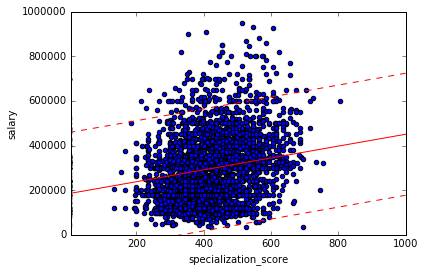

In [238]:
#evaluate specialization_score for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["specialization_score"], df_numeric_only["salary"])
print('Feature: specialization_score \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')
#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["specialization_score"], df_numeric_only["salary"])
#print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["specialization_score"], df_numeric_only["salary"])
_ = plt.xlim(5,1000)
_ = plt.ylim(0,1000000)
_ = plt.xlabel('specialization_score')
_ = plt.ylabel('salary')
_ = plt.plot([0,1000], [predict(intercept,slope,0), predict(intercept,slope,1000)], 'r',
             [0,1000], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,1000)-2*stderr], 'r--',
             [0,1000], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,1000)+2*stderr], 'r--')


Feature: tenthpercentage 
alpha: -11556.5663283 beta: 3920.94369094 r-squared: 0.274860394535
p-value for a two-sided test of H0 that slope is 0: 2.639198284142235e-69
Can we reject H0? Yes
standard error 134928.27103021016

Scatter plot with regression line and 95% prediction interval:


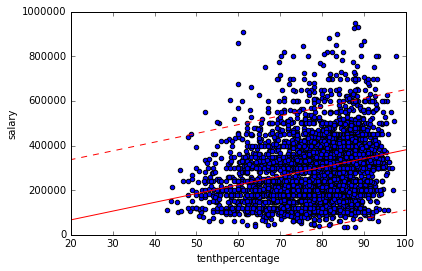

In [239]:
#evaluate tenthpercentage for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["tenthpercentage"], df_numeric_only["salary"])
print('Feature: tenthpercentage \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')

#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["tenthpercentage"], df_numeric_only["salary"])
print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["tenthpercentage"], df_numeric_only["salary"])
_ = plt.xlim(20,100)
_ = plt.ylim(0,1000000)
_ = plt.xlabel('tenthpercentage')
_ = plt.ylabel('salary')
_ = plt.plot([0,100], [predict(intercept,slope,0), predict(intercept,slope,100)], 'r',
             [0,100], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,100)-2*stderr], 'r--',
             [0,100], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,100)+2*stderr], 'r--')

Feature: twelvepercentage 
alpha: 44366.9190468 beta: 3351.51730894 r-squared: 0.262797212407
p-value for a two-sided test of H0 that slope is 0: 2.663368440418642e-63
Can we reject H0? Yes
standard error 135400.76540076974

Scatter plot with regression line and 95% prediction interval:


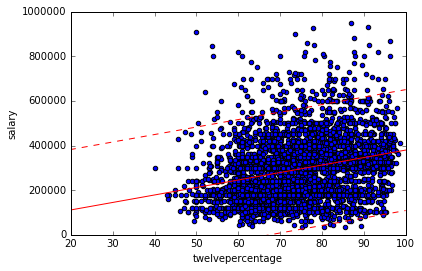

In [240]:
# evaluate twelvepercentage for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["twelvepercentage"], df_numeric_only["salary"])
print('Feature: twelvepercentage \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')
#for predictive interval graph
stderr = standard_error(intercept, slope, df_numeric_only["twelvepercentage"], df_numeric_only["salary"])
print("standard error", stderr)
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(df_numeric_only["twelvepercentage"], df_numeric_only["salary"])
_ = plt.xlim(20,100)
_ = plt.ylim(0,1000000)
_ = plt.xlabel('twelvepercentage')
_ = plt.ylabel('salary')
_ = plt.plot([0,100], [predict(intercept,slope,0), predict(intercept,slope,100)], 'r',
             [0,100], [predict(intercept,slope,0)-2*stderr, predict(intercept,slope,100)-2*stderr], 'r--',
             [0,100], [predict(intercept,slope,0)+2*stderr, predict(intercept,slope,100)+2*stderr], 'r--')


# Simple Linear Regression - Categorical variables

In [241]:
#evaluate college_tier for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["collegetier"], df_numeric_only["salary"])
print('Feature: collegetier \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')


Feature: collegetier 
alpha: 517619.491265 beta: -115999.772955 r-squared: -0.213677659445
p-value for a two-sided test of H0 that slope is 0: 5.868852047293227e-42
Can we reject H0? Yes


In [242]:
#evaluate specialization for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["specialization"], df_numeric_only["salary"])
print('Feature: specialization \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')


Feature: specialization 
alpha: 290730.408738 beta: 2722.06639793 r-squared: 0.0380592677299
p-value for a two-sided test of H0 that slope is 0: 0.01683558624771861
Can we reject H0? No


In [243]:
#evaluate gender for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["gender"], df_numeric_only["salary"])
print('Feature: gender \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')

Feature: gender 
alpha: 297009.012016 beta: -12631.3748852 r-squared: -0.0384616546426
p-value for a two-sided test of H0 that slope is 0: 0.015710645760218907
Can we reject H0? No


In [244]:
#evaluate twelvegraduation for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["twelvegraduation"], df_numeric_only["salary"])
print('Feature: twelvegraduation \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')


Feature: twelvegraduation 
alpha: 29590409.6002 beta: -14589.1736415 r-squared: -0.17092225252
p-value for a two-sided test of H0 that slope is 0: 3.0741916405174694e-27
Can we reject H0? Yes


In [245]:
#evaluate graduationyear for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["graduationyear"], df_numeric_only["salary"])
print('Feature: graduationyear \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')

Feature: graduationyear 
alpha: 416027.177623 beta: -60.6603615545 r-squared: -0.0138620907469
p-value for a two-sided test of H0 that slope is 0: 0.3841240123243753
Can we reject H0? No


In [246]:
#evaluate degree for feature selection
slope, intercept, r_value, p_value, slope_stderr = linregress(df_numeric_only["degree"], df_numeric_only["salary"])
print('Feature: degree \nalpha: %s beta: %s r-squared: %s' % (intercept, slope, r_value))
print('p-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')

Feature: degree 
alpha: 296435.447999 beta: -11786.9015853 r-squared: -0.0626431272212
p-value for a two-sided test of H0 that slope is 0: 8.261400143351008e-05
Can we reject H0? Yes


# Multiple Regression

In [184]:
#LinearRegression is performed after the dataframe has been split into Train and Test set
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np

# Creating a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.33,random_state=5) # so we get the same results
# Fitting a model
lm = LinearRegression()
_ = lm.fit(X_train, Y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)
print('\nR-squared:', lm.score(X_train, Y_train))

# We can predict the salary for 10 people 
print('\nPredicting the salary for top 10 people:\n', lm.predict(X_test)[:10])


#Standard error is used to assess the precision of the predictions from the regression line. 
# Calculating the standard error for Ytrain and Xtrain
stderr_train = math.sqrt(np.mean((Y_train - lm.predict(X_train))**2))
print('\nStandard error for train set:', stderr_train)

#Calculating the error for Xtest and Ytest
stderr_test = math.sqrt(np.mean((Y_test - lm.predict(X_test))**2))
print('\nStandard error for test set:', stderr_test)

Intercept: 8436.69865598
Coefficients:
 [ -1.17179591e-04  -2.11683436e+01   1.52149714e+00  -4.24629352e+00
   1.04570711e+00  -9.63915183e-04  -5.46624543e+01  -4.76153930e+00
   1.02366831e+00   1.48121088e+00   1.93464953e-02   1.86718291e-01
   4.29520440e-02   1.41728438e-01   1.17399074e-01]

R-squared: 0.310092483582

Predicting the salary for top 10 people:
 [ 237.79444139  256.54931565  305.80438032  235.73612409  211.8668422
  279.39526493  218.85362033  294.57343852  260.71337855   95.83760334]

Standard error for train set: 116.56060626610895

Standard error for test set: 117.18510469700045



Predictions should be within 233.1k INR at 95% confidence according to training data.
Predictions should be within 234.4k INR at 95% confidence according to test data.

Residual plot for training data (blue) and test data (green):


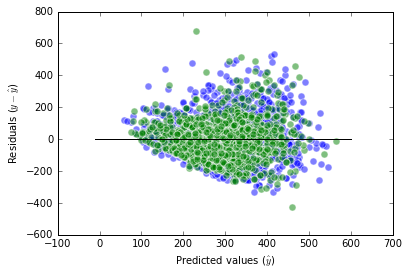

In [185]:
#95% Confidence Interval of the observation should fall within (+/-)2*standard error from the regression line

print('\nPredictions should be within {:.1f}k INR at 95% confidence according to training data.'.format(2*stderr_train))
print('Predictions should be within {:.1f}k INR at 95% confidence according to test data.'.format(2*stderr_test))

print('\nResidual plot for training data (blue) and test data (green):')
_ = plt.scatter(lm.predict(X_train), Y_train-lm.predict(X_train), c='blue', s=50, alpha=0.5, edgecolor='white')
_ = plt.scatter(lm.predict(X_test), Y_test-lm.predict(X_test), c='green', s=50, alpha=0.5, edgecolor='white')
_ = plt.plot([-10,600], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')



Residual plot for actual data (blue) and predicted data (green):


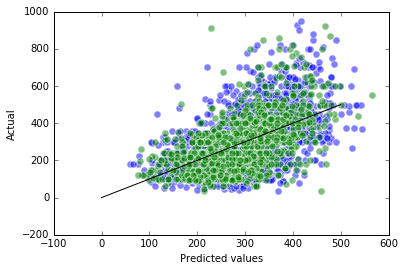

In [187]:
print('\nResidual plot for actual data (blue) and predicted data (green):')
_ = plt.scatter(lm.predict(X_train), Y_train, c='blue', s=50, alpha=0.5, edgecolor='white')
_ = plt.scatter(lm.predict(X_test), Y_test, c='green', s=50, alpha=0.5, edgecolor='white')
_ = plt.plot([0,500], [0,500], c='black')
_ = plt.ylabel('Actual')
_ = plt.xlabel('Predicted values')

# Improvement: Logistic regression

In [197]:
#salary data was categorised to different salary slabs with 0 being 0-250k, 1 being 250k-500k and 2 being 500k - 1000k
#sci-kit learn method for logistic regression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

#assigning the target to salary categories
target = df_numeric_only["salary_category"]

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.33,
                                                    random_state=5) # so we get the same results

# fitting a model with logistic regression from Sci-Kit
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the salaries 
print('\nPredicted values for first five people :', logreg.predict(X_test)[:5])
print('Actuals values for first five people from test split:', Y_test[:5])

Intercept: [  2.11803563e-06  -2.03058229e-06  -6.74634812e-07]
Coefficients:
 [[  1.47654592e-06   5.39222625e-04  -2.82994500e-02   1.50116265e-03
   -2.35692971e-02   2.61363088e-05   1.09014141e-03   1.68215092e-03
    4.52779191e-04  -2.95988333e-02   3.12293751e-03  -3.79322243e-03
   -5.55742191e-04  -3.51980489e-03  -1.76150462e-03]
 [ -4.84147150e-07   3.37233175e-04   2.06504940e-02  -7.58659930e-04
    1.81773414e-02  -2.05996649e-05  -5.58175975e-05  -1.27799200e-03
   -1.52928923e-03   1.81238517e-02  -2.70786519e-03   2.70544112e-03
    2.72587938e-04   2.59328833e-03   7.45254940e-04]
 [ -3.59468062e-06  -7.13177384e-06   1.95991387e-04  -1.35521755e-03
    2.48954316e-04   7.06299316e-06  -1.07551347e-05   5.17342514e-07
    2.10015473e-05   1.27970635e-04  -1.24558525e-03   1.88362222e-03
    1.61663251e-03   2.89840828e-03   2.39107115e-03]]

Predicted values for first five people : [0 1 1 0 0]
Actuals values for first five people from test split: 1703    1
3691    1


In [189]:
#evaluating the various measures using classification report
from sklearn.metrics import classification_report
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(target)])
#print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.68      0.68      0.68       579
          1       0.63      0.71      0.67       640
          2       0.00      0.00      0.00        83

avg / total       0.61      0.65      0.63      1302



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
[[395 184   0]
 [183 457   0]
 [  4  79   0]]


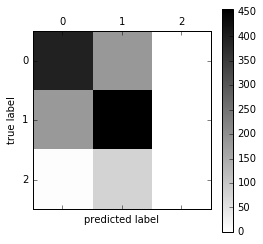

In [193]:
#Evaluating the confusion matrix by using sklearn function for actual and predicted labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print("Confusion Matrix:\n%s" % confusion_matrix(Y_test, logreg.predict(X_test)))

_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

In [192]:
#Calculating the accuracy score by using accuracy_score function from sklearn for actual and predicted labels
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, logreg.predict(X_test))
print(score)

0.654377880184
